In [1]:
import sys

sys.path.append('../gtm/')
sys.path.append('../simulation/')

In [2]:
import importlib
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import pickle
import numpy as np
from random import random
from tqdm import tqdm

import torch
import pandas as pd

from corpus import GTMCorpus
from gtm import GTM
from sim_gtm import generate_docs_by_gtm, estimate_dist_by_gtm
from sim_lda import generate_docs_by_lda, estimate_dist_by_lda


/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### check lambda with 4 topics
- set the true_lambda
- estimate lambda (*100 times)

#### dirichlet_mlp (update_prior=True)

In [3]:
num_topics = 4
num_iters = 10
seed = 0
np.random.seed(seed)

doc_args = {
    "num_content_covs": 2,
    "num_prev_covs": 2,
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
}
gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": True,
        "w_prior":None,
        "doc_topic_prior": "dirichlet",
        "decoder_type": "mlp",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        # "seed":seed
        }

### setting the true_lambda
true_lambda_ = np.random.rand(doc_args["num_content_covs"], num_topics)
true_lambda_ = true_lambda_ - true_lambda_[:, 0][:, None]

### generating docs

print("generate docs")
df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
    num_topics=num_topics,
    doc_topic_prior=gtm_model_args["doc_topic_prior"],
    decoder_type=gtm_model_args["decoder_type"],
    seed=seed,
    update_prior=gtm_model_args["update_prior"],
    lambda_=true_lambda_,
    sigma=None,
    doc_args=doc_args,
    is_output=False,
)
print()
print("estimate lambda")
estimated_lambda_list = []
for i in tqdm(range(num_iters)):
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"],
            "prevalence":docs_gtm["prevalence_covariates"],
            "content": docs_gtm["content_covariates"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
        prevalence="~ prevalence",
        content="~ content",
    )
    gtm_model_args["seed"] = i
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args,
    )
    estimated_lambda_list.append(tm_test.prior.lambda_)
    if i % 10 == 0:
        print("finished {} epochs".format(i))
# mean_estimated_lambda = np.mean(estimated_lambda_list, axis=0)

generate docs


100%|██████████| 5000/5000 [00:56<00:00, 88.93it/s]



estimate lambda


  0%|          | 0/10 [00:00<?, ?it/s]


Epoch   1	Mean Training Loss:3.7694473

Topic_0: ['word_493', 'word_838', 'word_738', 'word_371', 'word_287']
Topic_1: ['word_502', 'word_493', 'word_245', 'word_574', 'word_738']
Topic_2: ['word_287', 'word_372', 'word_838', 'word_371', 'word_493']
Topic_3: ['word_502', 'word_574', 'word_383', 'word_245', 'word_189']
Intercept: ['word_502', 'word_383', 'word_574', 'word_189', 'word_287']
content: ['word_493', 'word_838', 'word_372', 'word_308', 'word_287']



Epoch   2	Mean Training Loss:1.7372527

Topic_0: ['word_493', 'word_371', 'word_738', 'word_838', 'word_372']
Topic_1: ['word_502', 'word_493', 'word_383', 'word_574', 'word_245']
Topic_2: ['word_371', 'word_287', 'word_838', 'word_493', 'word_330']
Topic_3: ['word_502', 'word_574', 'word_383', 'word_245', 'word_371']
Intercept: ['word_502', 'word_383', 'word_493', 'word_574', 'word_371']
content: ['word_493', 'word_838', 'word_371', 'word_287', 'word_136']



Epoch   3	Mean Training Loss:1.1392682

Topic_0: ['word_493', 'word_7

 10%|█         | 1/10 [04:45<42:53, 285.94s/it]

finished 0 epochs

Epoch   1	Mean Training Loss:3.7925657

Topic_0: ['word_371', 'word_574', 'word_287', 'word_308', 'word_372']
Topic_1: ['word_502', 'word_574', 'word_189', 'word_383', 'word_308']
Topic_2: ['word_287', 'word_308', 'word_371', 'word_515', 'word_838']
Topic_3: ['word_383', 'word_484', 'word_515', 'word_861', 'word_838']
Intercept: ['word_383', 'word_502', 'word_493', 'word_574', 'word_838']
content: ['word_493', 'word_838', 'word_371', 'word_287', 'word_372']



Epoch   2	Mean Training Loss:1.7382514

Topic_0: ['word_502', 'word_574', 'word_371', 'word_287', 'word_308']
Topic_1: ['word_502', 'word_574', 'word_383', 'word_493', 'word_287']
Topic_2: ['word_287', 'word_371', 'word_308', 'word_838', 'word_493']
Topic_3: ['word_383', 'word_502', 'word_486', 'word_484', 'word_493']
Intercept: ['word_502', 'word_493', 'word_383', 'word_574', 'word_371']
content: ['word_493', 'word_371', 'word_838', 'word_287', 'word_372']



Epoch   3	Mean Training Loss:1.0637370

Topic_0: ['

 20%|██        | 2/10 [09:54<39:55, 299.38s/it]


Epoch   1	Mean Training Loss:3.9948833

Topic_0: ['word_502', 'word_574', 'word_371', 'word_383', 'word_189']
Topic_1: ['word_493', 'word_838', 'word_287', 'word_371', 'word_515']
Topic_2: ['word_502', 'word_574', 'word_287', 'word_308', 'word_371']
Topic_3: ['word_287', 'word_245', 'word_493', 'word_371', 'word_440']
Intercept: ['word_502', 'word_493', 'word_383', 'word_574', 'word_189']
content: ['word_371', 'word_493', 'word_287', 'word_838', 'word_136']



Epoch   2	Mean Training Loss:1.3935915

Topic_0: ['word_502', 'word_383', 'word_574', 'word_371', 'word_493']
Topic_1: ['word_493', 'word_838', 'word_502', 'word_371', 'word_287']
Topic_2: ['word_502', 'word_371', 'word_574', 'word_493', 'word_287']
Topic_3: ['word_287', 'word_245', 'word_502', 'word_371', 'word_308']
Intercept: ['word_502', 'word_383', 'word_493', 'word_574', 'word_371']
content: ['word_371', 'word_493', 'word_838', 'word_287', 'word_136']



Epoch   3	Mean Training Loss:1.0977051

Topic_0: ['word_502', 'word_5

 30%|███       | 3/10 [15:03<35:26, 303.72s/it]


Epoch   1	Mean Training Loss:4.0349789

Topic_0: ['word_502', 'word_574', 'word_383', 'word_245', 'word_189']
Topic_1: ['word_502', 'word_383', 'word_493', 'word_515', 'word_371']
Topic_2: ['word_502', 'word_383', 'word_574', 'word_245', 'word_515']
Topic_3: ['word_493', 'word_372', 'word_308', 'word_838', 'word_383']
Intercept: ['word_502', 'word_383', 'word_574', 'word_493', 'word_287']
content: ['word_493', 'word_515', 'word_136', 'word_372', 'word_371']



Epoch   2	Mean Training Loss:1.8512139

Topic_0: ['word_502', 'word_574', 'word_383', 'word_493', 'word_189']
Topic_1: ['word_502', 'word_383', 'word_574', 'word_486', 'word_484']
Topic_2: ['word_502', 'word_574', 'word_383', 'word_245', 'word_493']
Topic_3: ['word_493', 'word_838', 'word_371', 'word_372', 'word_287']
Intercept: ['word_502', 'word_383', 'word_493', 'word_574', 'word_371']
content: ['word_493', 'word_371', 'word_136', 'word_838', 'word_515']



Epoch   3	Mean Training Loss:1.1261245

Topic_0: ['word_502', 'word_5

 40%|████      | 4/10 [20:21<30:55, 309.22s/it]


Epoch   1	Mean Training Loss:3.9243387

Topic_0: ['word_502', 'word_493', 'word_189', 'word_383', 'word_308']
Topic_1: ['word_502', 'word_493', 'word_383', 'word_574', 'word_189']
Topic_2: ['word_493', 'word_287', 'word_738', 'word_515', 'word_838']
Topic_3: ['word_574', 'word_502', 'word_383', 'word_371', 'word_838']
Intercept: ['word_502', 'word_383', 'word_574', 'word_371', 'word_189']
content: ['word_493', 'word_287', 'word_371', 'word_372', 'word_515']



Epoch   2	Mean Training Loss:1.8920257

Topic_0: ['word_502', 'word_383', 'word_493', 'word_189', 'word_574']
Topic_1: ['word_502', 'word_493', 'word_574', 'word_383', 'word_371']
Topic_2: ['word_493', 'word_838', 'word_371', 'word_287', 'word_213']
Topic_3: ['word_502', 'word_383', 'word_574', 'word_245', 'word_189']
Intercept: ['word_502', 'word_383', 'word_493', 'word_574', 'word_371']
content: ['word_493', 'word_371', 'word_287', 'word_838', 'word_372']



Epoch   3	Mean Training Loss:1.1136136

Topic_0: ['word_502', 'word_4

 50%|█████     | 5/10 [25:20<25:28, 305.72s/it]


Epoch   1	Mean Training Loss:4.8531725

Topic_0: ['word_502', 'word_493', 'word_838', 'word_371', 'word_287']
Topic_1: ['word_502', 'word_574', 'word_189', 'word_383', 'word_245']
Topic_2: ['word_493', 'word_371', 'word_838', 'word_287', 'word_502']
Topic_3: ['word_502', 'word_574', 'word_493', 'word_484', 'word_372']
Intercept: ['word_502', 'word_383', 'word_493', 'word_574', 'word_287']
content: ['word_838', 'word_515', 'word_493', 'word_371', 'word_287']



Epoch   2	Mean Training Loss:1.3646209

Topic_0: ['word_502', 'word_371', 'word_287', 'word_838', 'word_493']
Topic_1: ['word_502', 'word_574', 'word_383', 'word_493', 'word_189']
Topic_2: ['word_493', 'word_502', 'word_371', 'word_738', 'word_838']
Topic_3: ['word_502', 'word_493', 'word_383', 'word_574', 'word_371']
Intercept: ['word_502', 'word_383', 'word_493', 'word_574', 'word_371']
content: ['word_838', 'word_493', 'word_371', 'word_287', 'word_515']



Epoch   3	Mean Training Loss:0.9917469

Topic_0: ['word_371', 'word_5

 60%|██████    | 6/10 [29:48<19:30, 292.70s/it]


Epoch   1	Mean Training Loss:3.8712991

Topic_0: ['word_493', 'word_371', 'word_287', 'word_372', 'word_502']
Topic_1: ['word_493', 'word_502', 'word_371', 'word_287', 'word_838']
Topic_2: ['word_372', 'word_383', 'word_493', 'word_502', 'word_245']
Topic_3: ['word_502', 'word_383', 'word_574', 'word_245', 'word_493']
Intercept: ['word_502', 'word_383', 'word_493', 'word_574', 'word_838']
content: ['word_493', 'word_515', 'word_287', 'word_308', 'word_838']



Epoch   2	Mean Training Loss:1.8183591

Topic_0: ['word_493', 'word_371', 'word_287', 'word_838', 'word_502']
Topic_1: ['word_493', 'word_371', 'word_287', 'word_838', 'word_136']
Topic_2: ['word_502', 'word_383', 'word_493', 'word_245', 'word_574']
Topic_3: ['word_502', 'word_574', 'word_383', 'word_493', 'word_245']
Intercept: ['word_502', 'word_383', 'word_493', 'word_574', 'word_371']
content: ['word_493', 'word_515', 'word_287', 'word_738', 'word_136']



Epoch   3	Mean Training Loss:1.2633405

Topic_0: ['word_493', 'word_3

 70%|███████   | 7/10 [34:28<14:25, 288.55s/it]


Epoch   1	Mean Training Loss:4.6758847

Topic_0: ['word_502', 'word_574', 'word_308', 'word_838', 'word_533']
Topic_1: ['word_493', 'word_738', 'word_371', 'word_838', 'word_372']
Topic_2: ['word_383', 'word_502', 'word_189', 'word_838', 'word_287']
Topic_3: ['word_371', 'word_493', 'word_287', 'word_308', 'word_372']
Intercept: ['word_502', 'word_383', 'word_574', 'word_493', 'word_371']
content: ['word_493', 'word_838', 'word_515', 'word_287', 'word_372']



Epoch   2	Mean Training Loss:1.7615848

Topic_0: ['word_502', 'word_574', 'word_493', 'word_383', 'word_189']
Topic_1: ['word_493', 'word_738', 'word_371', 'word_838', 'word_372']
Topic_2: ['word_383', 'word_502', 'word_189', 'word_574', 'word_245']
Topic_3: ['word_371', 'word_287', 'word_493', 'word_308', 'word_213']
Intercept: ['word_502', 'word_383', 'word_493', 'word_371', 'word_574']
content: ['word_493', 'word_838', 'word_287', 'word_160', 'word_515']



Epoch   3	Mean Training Loss:1.1966989

Topic_0: ['word_502', 'word_5

 80%|████████  | 8/10 [39:10<09:33, 286.56s/it]


Epoch   1	Mean Training Loss:4.4328026

Topic_0: ['word_287', 'word_371', 'word_838', 'word_515', 'word_493']
Topic_1: ['word_502', 'word_383', 'word_574', 'word_245', 'word_189']
Topic_2: ['word_383', 'word_502', 'word_574', 'word_287', 'word_245']
Topic_3: ['word_502', 'word_472', 'word_838', 'word_574', 'word_189']
Intercept: ['word_502', 'word_383', 'word_574', 'word_189', 'word_493']
content: ['word_371', 'word_493', 'word_308', 'word_287', 'word_838']



Epoch   2	Mean Training Loss:1.8573953

Topic_0: ['word_287', 'word_371', 'word_838', 'word_493', 'word_330']
Topic_1: ['word_502', 'word_383', 'word_574', 'word_493', 'word_245']
Topic_2: ['word_502', 'word_383', 'word_287', 'word_574', 'word_245']
Topic_3: ['word_502', 'word_493', 'word_472', 'word_383', 'word_189']
Intercept: ['word_502', 'word_493', 'word_383', 'word_574', 'word_371']
content: ['word_493', 'word_371', 'word_838', 'word_287', 'word_136']



Epoch   3	Mean Training Loss:1.0874047

Topic_0: ['word_287', 'word_3

 90%|█████████ | 9/10 [50:28<06:48, 408.90s/it]


Epoch   1	Mean Training Loss:5.9598320

Topic_0: ['word_838', 'word_502', 'word_493', 'word_372', 'word_287']
Topic_1: ['word_383', 'word_502', 'word_574', 'word_189', 'word_287']
Topic_2: ['word_308', 'word_371', 'word_383', 'word_502', 'word_372']
Topic_3: ['word_502', 'word_383', 'word_574', 'word_245', 'word_372']
Intercept: ['word_502', 'word_383', 'word_574', 'word_371', 'word_838']
content: ['word_838', 'word_515', 'word_371', 'word_308', 'word_287']



Epoch   2	Mean Training Loss:1.6900648

Topic_0: ['word_493', 'word_502', 'word_838', 'word_372', 'word_287']
Topic_1: ['word_502', 'word_574', 'word_383', 'word_189', 'word_493']
Topic_2: ['word_493', 'word_371', 'word_287', 'word_308', 'word_502']
Topic_3: ['word_502', 'word_383', 'word_574', 'word_493', 'word_245']
Intercept: ['word_502', 'word_493', 'word_383', 'word_574', 'word_371']
content: ['word_493', 'word_371', 'word_515', 'word_838', 'word_287']



Epoch   3	Mean Training Loss:1.1079740

Topic_0: ['word_493', 'word_8

100%|██████████| 10/10 [54:27<00:00, 326.71s/it]


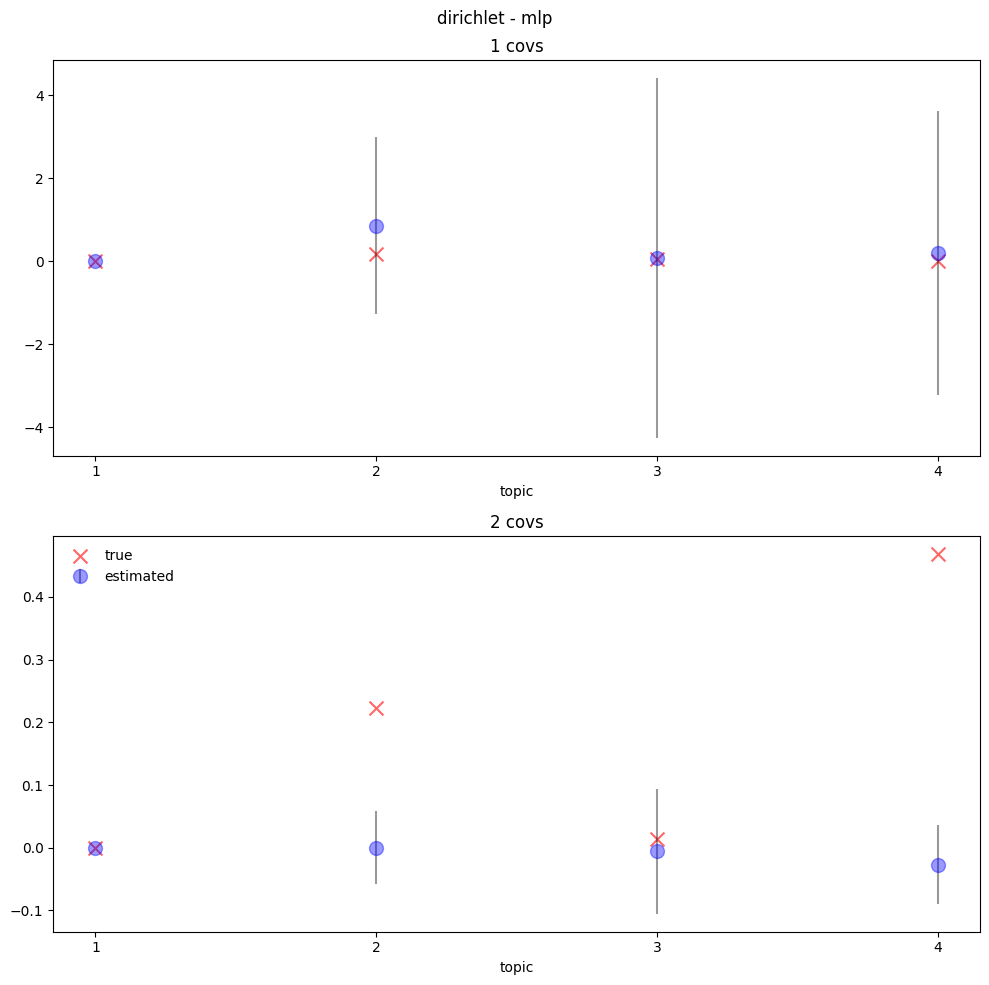

In [4]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
fig.suptitle('{} - {}'.format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
for i in range(doc_args["num_content_covs"]):
    ax = fig.add_subplot(doc_args["num_content_covs"], 1, i+1,xlabel="topic")
    true_lambda = true_lambda_[i]
    df_estimated_lambda = pd.DataFrame([estimated_lambda_list[j][i] for j in range(num_iters)])
    x = np.array([t+1 for t in range(num_topics)])
    mean = df_estimated_lambda.mean(axis=0)
    std = df_estimated_lambda.std(axis=0)
    ax.errorbar(x, mean, yerr=std,fmt='o', markersize=10, ecolor='black', markeredgecolor= "blue", color='b',label="estimated",alpha=0.4)
    ax.scatter(x,true_lambda, marker='x', s=100, color="red", label="true",alpha=0.6)
    ax.set_xticks([t+1 for t in range(num_topics)])
    ax.set_title("{} covs".format(i+1))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.legend(framealpha=0)
plt.subplots_adjust(hspace=0.4)
plt.show()

#### dirichlet_sage (update=False)
- this combination performed really bad

#### diri_sage (update=True)

In [5]:
num_topics = 4
num_iters = 10
seed = 0
np.random.seed(seed)

doc_args = {
    "num_content_covs": 2,
    "num_prev_covs": 2,
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
}
gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": True,
        "w_prior":None,
        "doc_topic_prior": "dirichlet",
        "decoder_type": "sage",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        # "seed":seed
        }

### setting the true_lambda
true_lambda_ = np.random.rand(doc_args["num_content_covs"], num_topics)
true_lambda_ = true_lambda_ - true_lambda_[:, 0][:, None]

### generating docs

print("generate docs")
df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
    num_topics=num_topics,
    doc_topic_prior=gtm_model_args["doc_topic_prior"],
    decoder_type=gtm_model_args["decoder_type"],
    seed=seed,
    update_prior=gtm_model_args["update_prior"],
    lambda_=true_lambda_,
    sigma=None,
    doc_args=doc_args,
    is_output=False,
)
print()
print("estimate lambda")
estimated_lambda_list = []
for i in tqdm(range(num_iters)):
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"],
            "prevalence":docs_gtm["prevalence_covariates"],
            "content": docs_gtm["content_covariates"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
        prevalence="~ prevalence",
        content="~ content",
    )
    gtm_model_args["seed"] = i
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args,
    )
    estimated_lambda_list.append(tm_test.prior.lambda_)
    if i % 10 == 0:
        print("finished {} epochs".format(i))
# mean_estimated_lambda = np.mean(estimated_lambda_list, axis=0)

generate docs


100%|██████████| 5000/5000 [00:50<00:00, 98.76it/s] 



estimate lambda


  0%|          | 0/10 [00:00<?, ?it/s]


Epoch   1	Mean Training Loss:12.5430790

Topic_0: ['word_906', 'word_860', 'word_59', 'word_472', 'word_875']
Topic_1: ['word_187', 'word_200', 'word_564', 'word_674', 'word_643']
Topic_2: ['word_476', 'word_941', 'word_510', 'word_169', 'word_225']
Topic_3: ['word_285', 'word_284', 'word_527', 'word_548', 'word_192']



Epoch   2	Mean Training Loss:2.6254236

Topic_0: ['word_860', 'word_59', 'word_472', 'word_906', 'word_259']
Topic_1: ['word_187', 'word_674', 'word_564', 'word_200', 'word_953']
Topic_2: ['word_476', 'word_941', 'word_510', 'word_169', 'word_87']
Topic_3: ['word_285', 'word_548', 'word_527', 'word_284', 'word_192']



Epoch   3	Mean Training Loss:2.6259699

Topic_0: ['word_860', 'word_472', 'word_59', 'word_906', 'word_259']
Topic_1: ['word_674', 'word_187', 'word_564', 'word_953', 'word_647']
Topic_2: ['word_476', 'word_941', 'word_169', 'word_310', 'word_87']
Topic_3: ['word_548', 'word_285', 'word_527', 'word_192', 'word_957']



Epoch   4	Mean Training Loss:2.617

 10%|█         | 1/10 [03:51<34:42, 231.40s/it]

finished 0 epochs

Epoch   1	Mean Training Loss:12.4066328

Topic_0: ['word_438', 'word_219', 'word_942', 'word_943', 'word_392']
Topic_1: ['word_926', 'word_94', 'word_799', 'word_613', 'word_354']
Topic_2: ['word_603', 'word_143', 'word_307', 'word_376', 'word_760']
Topic_3: ['word_542', 'word_77', 'word_153', 'word_352', 'word_64']



Epoch   2	Mean Training Loss:2.6292461

Topic_0: ['word_438', 'word_219', 'word_942', 'word_943', 'word_731']
Topic_1: ['word_94', 'word_799', 'word_343', 'word_613', 'word_926']
Topic_2: ['word_143', 'word_376', 'word_307', 'word_874', 'word_394']
Topic_3: ['word_542', 'word_77', 'word_153', 'word_756', 'word_172']



Epoch   3	Mean Training Loss:2.6173167

Topic_0: ['word_438', 'word_219', 'word_942', 'word_633', 'word_943']
Topic_1: ['word_94', 'word_799', 'word_343', 'word_288', 'word_613']
Topic_2: ['word_376', 'word_394', 'word_874', 'word_307', 'word_143']
Topic_3: ['word_77', 'word_153', 'word_542', 'word_756', 'word_172']



Epoch   4	Mean Tra

 20%|██        | 2/10 [07:35<30:15, 226.95s/it]


Epoch   1	Mean Training Loss:12.4439790

Topic_0: ['word_939', 'word_793', 'word_239', 'word_274', 'word_660']
Topic_1: ['word_586', 'word_467', 'word_136', 'word_845', 'word_872']
Topic_2: ['word_834', 'word_801', 'word_255', 'word_573', 'word_124']
Topic_3: ['word_432', 'word_441', 'word_144', 'word_180', 'word_902']



Epoch   2	Mean Training Loss:2.6334054

Topic_0: ['word_939', 'word_239', 'word_793', 'word_25', 'word_660']
Topic_1: ['word_586', 'word_467', 'word_136', 'word_872', 'word_845']
Topic_2: ['word_834', 'word_801', 'word_573', 'word_255', 'word_124']
Topic_3: ['word_441', 'word_432', 'word_144', 'word_180', 'word_902']



Epoch   3	Mean Training Loss:2.6195369

Topic_0: ['word_939', 'word_239', 'word_793', 'word_25', 'word_274']
Topic_1: ['word_586', 'word_467', 'word_136', 'word_872', 'word_845']
Topic_2: ['word_834', 'word_573', 'word_255', 'word_801', 'word_124']
Topic_3: ['word_441', 'word_432', 'word_144', 'word_799', 'word_180']



Epoch   4	Mean Training Loss:2.

 30%|███       | 3/10 [11:21<26:26, 226.70s/it]


Epoch   1	Mean Training Loss:12.5434934

Topic_0: ['word_229', 'word_742', 'word_345', 'word_399', 'word_21']
Topic_1: ['word_7', 'word_261', 'word_823', 'word_689', 'word_143']
Topic_2: ['word_237', 'word_710', 'word_311', 'word_514', 'word_896']
Topic_3: ['word_823', 'word_640', 'word_212', 'word_656', 'word_692']



Epoch   2	Mean Training Loss:2.6252037

Topic_0: ['word_229', 'word_345', 'word_742', 'word_108', 'word_21']
Topic_1: ['word_261', 'word_7', 'word_823', 'word_143', 'word_653']
Topic_2: ['word_237', 'word_710', 'word_110', 'word_896', 'word_139']
Topic_3: ['word_823', 'word_640', 'word_656', 'word_53', 'word_929']



Epoch   3	Mean Training Loss:2.6244579

Topic_0: ['word_229', 'word_345', 'word_108', 'word_21', 'word_852']
Topic_1: ['word_261', 'word_653', 'word_823', 'word_283', 'word_143']
Topic_2: ['word_237', 'word_710', 'word_110', 'word_868', 'word_896']
Topic_3: ['word_823', 'word_656', 'word_53', 'word_640', 'word_929']



Epoch   4	Mean Training Loss:2.6143826

 40%|████      | 4/10 [15:16<23:00, 230.04s/it]


Epoch   1	Mean Training Loss:12.3845886

Topic_0: ['word_521', 'word_998', 'word_70', 'word_109', 'word_966']
Topic_1: ['word_522', 'word_385', 'word_344', 'word_447', 'word_710']
Topic_2: ['word_801', 'word_169', 'word_794', 'word_243', 'word_696']
Topic_3: ['word_148', 'word_477', 'word_468', 'word_774', 'word_521']



Epoch   2	Mean Training Loss:2.6513636

Topic_0: ['word_521', 'word_998', 'word_70', 'word_130', 'word_109']
Topic_1: ['word_522', 'word_385', 'word_344', 'word_447', 'word_932']
Topic_2: ['word_801', 'word_696', 'word_169', 'word_794', 'word_907']
Topic_3: ['word_148', 'word_477', 'word_468', 'word_521', 'word_70']



Epoch   3	Mean Training Loss:2.6460361

Topic_0: ['word_998', 'word_521', 'word_70', 'word_130', 'word_763']
Topic_1: ['word_522', 'word_385', 'word_344', 'word_932', 'word_447']
Topic_2: ['word_801', 'word_696', 'word_794', 'word_907', 'word_169']
Topic_3: ['word_148', 'word_477', 'word_468', 'word_521', 'word_70']



Epoch   4	Mean Training Loss:2.624

 50%|█████     | 5/10 [19:00<18:59, 227.91s/it]


Epoch   1	Mean Training Loss:12.2632787

Topic_0: ['word_376', 'word_782', 'word_313', 'word_737', 'word_970']
Topic_1: ['word_313', 'word_564', 'word_227', 'word_958', 'word_102']
Topic_2: ['word_144', 'word_131', 'word_152', 'word_329', 'word_180']
Topic_3: ['word_401', 'word_728', 'word_258', 'word_290', 'word_315']



Epoch   2	Mean Training Loss:2.7167757

Topic_0: ['word_376', 'word_782', 'word_970', 'word_469', 'word_737']
Topic_1: ['word_564', 'word_313', 'word_958', 'word_227', 'word_102']
Topic_2: ['word_144', 'word_131', 'word_152', 'word_711', 'word_123']
Topic_3: ['word_401', 'word_728', 'word_258', 'word_315', 'word_290']



Epoch   3	Mean Training Loss:2.6671276

Topic_0: ['word_376', 'word_782', 'word_970', 'word_469', 'word_737']
Topic_1: ['word_564', 'word_313', 'word_958', 'word_966', 'word_227']
Topic_2: ['word_131', 'word_144', 'word_152', 'word_711', 'word_438']
Topic_3: ['word_401', 'word_728', 'word_315', 'word_258', 'word_290']



Epoch   4	Mean Training Loss:

 60%|██████    | 6/10 [27:38<21:45, 326.31s/it]


Epoch   1	Mean Training Loss:12.3801584

Topic_0: ['word_632', 'word_239', 'word_722', 'word_85', 'word_424']
Topic_1: ['word_204', 'word_222', 'word_938', 'word_203', 'word_620']
Topic_2: ['word_352', 'word_447', 'word_825', 'word_397', 'word_439']
Topic_3: ['word_356', 'word_915', 'word_231', 'word_83', 'word_295']



Epoch   2	Mean Training Loss:2.6633372

Topic_0: ['word_239', 'word_632', 'word_722', 'word_424', 'word_85']
Topic_1: ['word_204', 'word_938', 'word_620', 'word_222', 'word_996']
Topic_2: ['word_352', 'word_447', 'word_825', 'word_397', 'word_632']
Topic_3: ['word_915', 'word_356', 'word_83', 'word_881', 'word_175']



Epoch   3	Mean Training Loss:2.6501357

Topic_0: ['word_239', 'word_722', 'word_632', 'word_424', 'word_377']
Topic_1: ['word_938', 'word_204', 'word_620', 'word_996', 'word_830']
Topic_2: ['word_447', 'word_352', 'word_825', 'word_397', 'word_632']
Topic_3: ['word_915', 'word_881', 'word_83', 'word_175', 'word_356']



Epoch   4	Mean Training Loss:2.625

 70%|███████   | 7/10 [31:21<14:38, 292.75s/it]


Epoch   1	Mean Training Loss:12.4666678

Topic_0: ['word_262', 'word_329', 'word_211', 'word_903', 'word_875']
Topic_1: ['word_708', 'word_903', 'word_315', 'word_234', 'word_807']
Topic_2: ['word_432', 'word_0', 'word_510', 'word_784', 'word_483']
Topic_3: ['word_425', 'word_652', 'word_858', 'word_785', 'word_815']



Epoch   2	Mean Training Loss:2.6560550

Topic_0: ['word_329', 'word_875', 'word_903', 'word_262', 'word_926']
Topic_1: ['word_708', 'word_903', 'word_234', 'word_375', 'word_315']
Topic_2: ['word_432', 'word_0', 'word_510', 'word_576', 'word_735']
Topic_3: ['word_425', 'word_858', 'word_652', 'word_785', 'word_988']



Epoch   3	Mean Training Loss:2.6423236

Topic_0: ['word_329', 'word_875', 'word_926', 'word_903', 'word_805']
Topic_1: ['word_708', 'word_903', 'word_234', 'word_862', 'word_375']
Topic_2: ['word_432', 'word_510', 'word_0', 'word_576', 'word_735']
Topic_3: ['word_858', 'word_425', 'word_785', 'word_988', 'word_652']



Epoch   4	Mean Training Loss:2.6337

 80%|████████  | 8/10 [35:06<09:02, 271.12s/it]


Epoch   1	Mean Training Loss:12.3873520

Topic_0: ['word_815', 'word_418', 'word_857', 'word_245', 'word_218']
Topic_1: ['word_695', 'word_447', 'word_86', 'word_654', 'word_632']
Topic_2: ['word_542', 'word_80', 'word_903', 'word_842', 'word_952']
Topic_3: ['word_813', 'word_817', 'word_754', 'word_521', 'word_928']



Epoch   2	Mean Training Loss:2.6430340

Topic_0: ['word_815', 'word_418', 'word_245', 'word_218', 'word_760']
Topic_1: ['word_695', 'word_654', 'word_447', 'word_86', 'word_97']
Topic_2: ['word_80', 'word_542', 'word_903', 'word_168', 'word_885']
Topic_3: ['word_817', 'word_754', 'word_813', 'word_79', 'word_521']



Epoch   3	Mean Training Loss:2.6287443

Topic_0: ['word_815', 'word_418', 'word_218', 'word_245', 'word_594']
Topic_1: ['word_654', 'word_695', 'word_447', 'word_86', 'word_97']
Topic_2: ['word_80', 'word_168', 'word_903', 'word_542', 'word_885']
Topic_3: ['word_817', 'word_754', 'word_79', 'word_813', 'word_419']



Epoch   4	Mean Training Loss:2.6168178


 90%|█████████ | 9/10 [41:51<05:12, 312.94s/it]


Epoch   1	Mean Training Loss:12.5365326

Topic_0: ['word_544', 'word_505', 'word_847', 'word_706', 'word_26']
Topic_1: ['word_106', 'word_751', 'word_810', 'word_773', 'word_374']
Topic_2: ['word_117', 'word_931', 'word_143', 'word_370', 'word_95']
Topic_3: ['word_34', 'word_869', 'word_590', 'word_958', 'word_380']



Epoch   2	Mean Training Loss:2.6389139

Topic_0: ['word_544', 'word_505', 'word_847', 'word_706', 'word_26']
Topic_1: ['word_106', 'word_374', 'word_810', 'word_970', 'word_580']
Topic_2: ['word_931', 'word_143', 'word_117', 'word_95', 'word_370']
Topic_3: ['word_34', 'word_590', 'word_551', 'word_380', 'word_869']



Epoch   3	Mean Training Loss:2.6318099

Topic_0: ['word_505', 'word_544', 'word_847', 'word_706', 'word_26']
Topic_1: ['word_106', 'word_374', 'word_970', 'word_810', 'word_580']
Topic_2: ['word_931', 'word_143', 'word_117', 'word_95', 'word_358']
Topic_3: ['word_34', 'word_590', 'word_551', 'word_380', 'word_869']



Epoch   4	Mean Training Loss:2.6194349

100%|██████████| 10/10 [53:57<00:00, 323.70s/it]


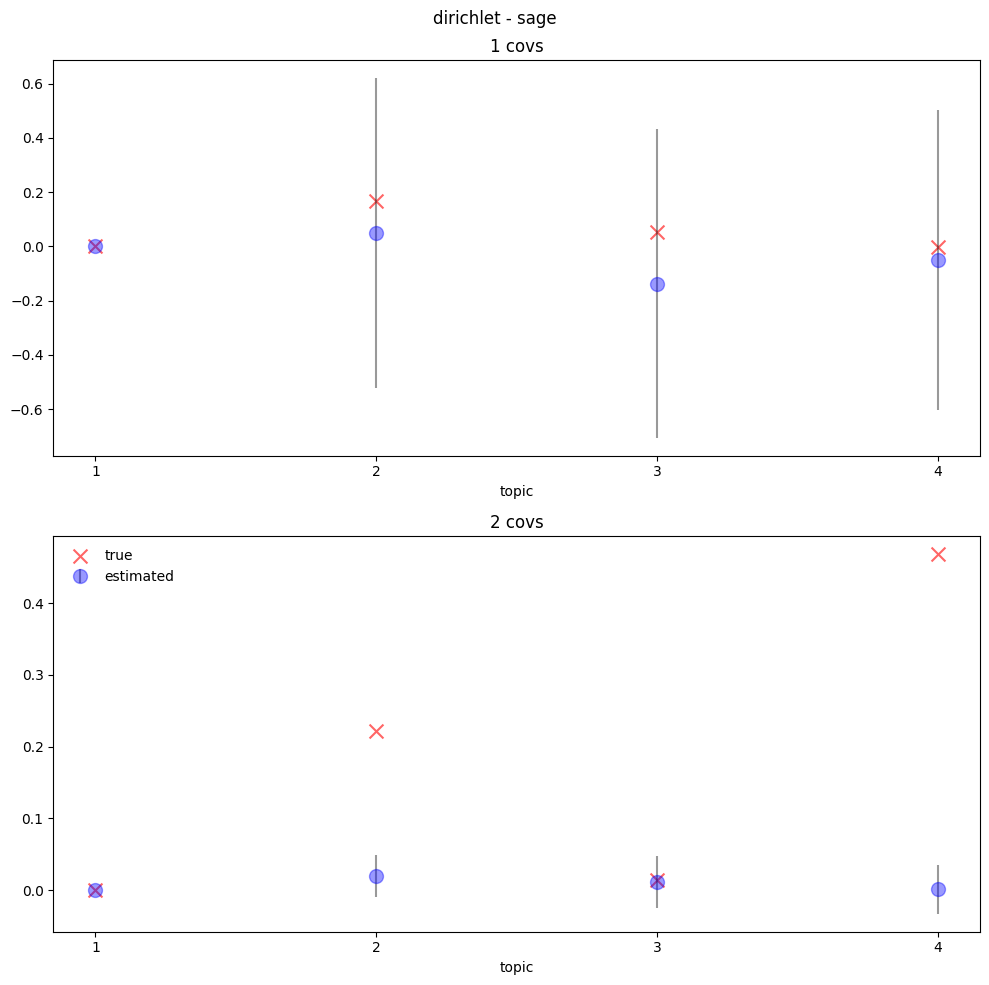

In [6]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
fig.suptitle('{} - {}'.format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
for i in range(doc_args["num_content_covs"]):
    ax = fig.add_subplot(doc_args["num_content_covs"], 1, i+1,xlabel="topic")
    true_lambda = true_lambda_[i]
    df_estimated_lambda = pd.DataFrame([estimated_lambda_list[j][i] for j in range(num_iters)])
    x = np.array([t+1 for t in range(num_topics)])
    mean = df_estimated_lambda.mean(axis=0)
    std = df_estimated_lambda.std(axis=0)
    ax.errorbar(x, mean, yerr=std,fmt='o', markersize=10, ecolor='black', markeredgecolor= "blue", color='b',label="estimated",alpha=0.4)
    ax.scatter(x,true_lambda, marker='x', s=100, color="red", label="true",alpha=0.6)
    ax.set_xticks([t+1 for t in range(num_topics)])
    ax.set_title("{} covs".format(i+1))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.legend(framealpha=0)
plt.subplots_adjust(hspace=0.4)
plt.show()